## 🏡📈 Analyse Approfondie des Prix Immobiliers : Défis et Solutions en Régression

#### LEPERCQ Louise, NITA Carmen Andreea, SARR Adja, THIOUNE Magatte Niang - M2 SIAD Projet BI / Big Data

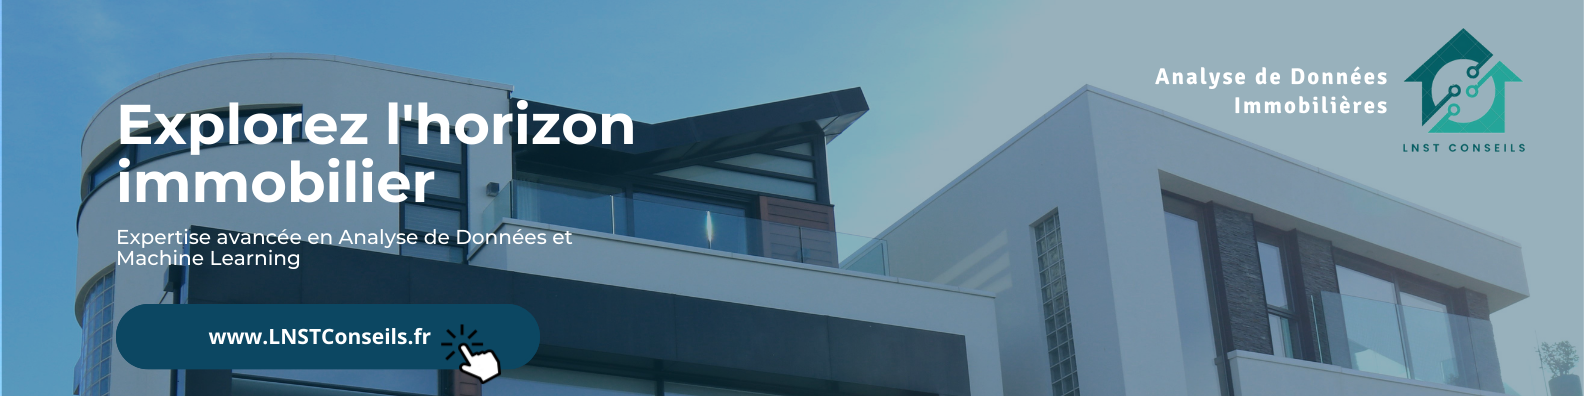

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">
💡 <strong> Compétition Kaggle </strong>

House Prices - Advanced Regression Techniques : Predict sales prices and practice feature engineering, RFs, and gradient boosting
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

</div>

## Etape 7 - Modélisation

1. [Introduction](#introduction)
1. [Modélisation](#modelisation)
    1. [Feature scaling](#feature_scaling)
    1. [Encodage des variables catégorielles](#encodage)
    1. [Label encoding](#label_encoding)
    1. [One Hot Encoding](#one_hot_encoding)
    1. [Construction des modèles](#construction_modeles)
        1. [Entraînement des modèles](#entrainement_modeles)
    1. [Evaluation des modèles](#evaluation_modeles)
    1. [K fold validation](#k_fold)
    1. [Optimisation des hyperparamètres](#optim)
1. [Importance des caractéristiques](#importance)
1. [Courbes d'apprentissage](#courbes)
1. [Apprentissage ensembliste](#apprentissage_ensembliste)
    1. [Apprentissage ensembliste simple](#apprentissage_ensembliste_simple)
    1. [Apprentissage ensembliste avancé](#apprentissage_ensembliste_avance)

# Partie 1 - Introduction <a class="anchor"  id="introduction"></a>
-----------------

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">

- Depuis plusieurs années, le marché de l’immobilier fluctue. Plusieurs facteurs entrent en jeu, chacun contribuant à l'évolution complexe du **marché immobilier**. Lorsque l’économie progresse, la demande de logements augmente généralement, ce qui peut impacter positivement les prix des logements. Et inversement, une baisse de l'économie peut provoquer une baisse des prix des logements. De plus, un autre facteur qui peut impacter les prix des logements est la localisation des logements. Les prix des logements en métropole seront plus élevés que les prix des logements se situant en pleine campagne. Puis, les caractéristiques du logement seront aussi déterminants pour le prix du logement.

- Aujourd’hui notre entreprise **LNST Conseils** a été missionnée de réaliser une **analyse prédictive des prix des logements**. Pour cela, nous avons un disposition un fichier dans lequel nous pouvons retrouver des caractéristiques du logement, ainsi que des informations sur la localisation du logement. Ce fichier va nous servir à tester différents modèles de prédiction et une fois affiner, le modèle sera capable de prédire le prix des logements selon leurs caractéristiques.

- Ce projet est ancré au sein de la **compétition Kaggle "House Prices - Advanced Regression Techniques"**. L'objectif fondamental qui sous-tend cette initiative est d'exploiter des approches avancées en matière de régression, notamment le *feature engineering* et la construction des modèles de prédiction des prix immobiliers d'une grande robustesse.

- L'**objectif** ultime est de développer un modèle qui puisse offrir des prédictions fiables et précises sur les prix immobiliers. Cette compétition Kaggle offre une opportunité exceptionnelle d'explorer et de mettre en œuvre des techniques de pointe en matière d'apprentissage automatique pour résoudre un défi concret dans le domaine de l'immobilier.

</div>

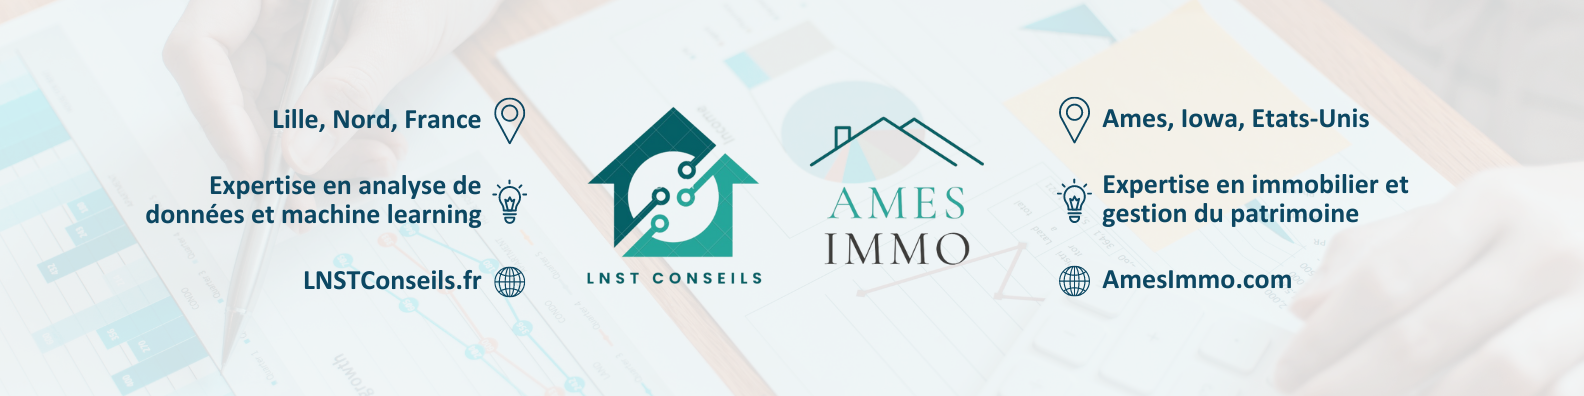

# Partie 2 - Modélisation <a class="anchor"  id="modelisation"></a>
-----------------

In [ ]:
# Importations des bibliothèques nécessaires

import pandas as pd # Pour la manipulation des données
import numpy as np # Pour les calculs numériques
from scipy import stats # Pour les fonctions statistiques
from scipy.stats import chi2_contingency # Pour l'analyse de contingence

# Personnaliser les visualisations
## Seaborn et matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
sns.set_style({'axes.grid':False})
## Plotly
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

# Filtrage des avertissements
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) # Ignorer les avertissements de dépréciation
wrn.filterwarnings('ignore', category = FutureWarning) # Ignorer les avertissements futurs
wrn.filterwarnings('ignore', category = UserWarning) # Ignorer les avertissements utilisateur

In [ ]:
# Création du dataframe

df_merged_num = pd.read_csv('df_merged_num.csv', sep = ',')
df_merged_num.head()

superficieEtage1  superficieEtage2  superficieRallonge3Saisons  nbChambres  \
0          6.753438          6.751101                         0.0           3   
1          7.141245          0.000000                         0.0           3   
2          6.825460          6.765039                         0.0           3   
3          6.869014          6.629363                         0.0           3   
4          7.044033          6.960348                         0.0           4   

   superficieFinieSousSol1  superficieFinieSousSol2  nbSallesBainSs  \
0                 6.561031                      0.0             1.0   
1                 6.886532                      0.0             0.0   
2                 6.188264                      0.0             1.0   
3                 5.379897                      0.0             1.0   
4                 6.486161                      0.0             1.0   

   nbDemiSallesBainSs  superficieSousSolNonAmenagee  superficiePorcheFerme  \
0            0.000000                      5.017280               0.000000   
1            0.693147                      5.652489               0.000000   
2            0.000000                      6.075346               0.000000   
3            0.000000                      6.293419               5.609472   
4            0.000000                      6.196444               0.000000   

   ...  qualiteGlobale  superficiePiscine       prix  superficieSolarium  \
0  ...               7                0.0  12.161968                 0.0   
1  ...               6                0.0  12.023285                 0.0   
2  ...               7                0.0  12.231440                 0.0   
3  ...               7                0.0  11.763674                 0.0   
4  ...               8                0.0  12.343489                 0.0   

   nbPieces  superficieTotaleSousSol  superficieTerrasseBois  \
0         8                79.525002                0.000000   
1         6               117.243636                3.356378   
2         6                85.470797                0.000000   
3         7                70.234698                0.000000   
4         9               106.373981                2.935843   

   anneeConstruction  anneeRenovation  anneeVente  
0               2003             2003        2008  
1               1976             1976        2007  
2               2001             2002        2008  
3               1915             1970        2006  
4               2000             2000        2008  

[5 rows x 38 columns]

In [ ]:
df_merged_num.shape

(2903, 38)

In [ ]:
# Création du dataframe

df_merged = pd.read_csv('df_merged.csv', sep = ',')
df_merged.head()

superficieEtage1  superficieEtage2  superficieRallonge3Saisons  \
0               856               854                           0   
1              1262                 0                           0   
2               920               866                           0   
3               961               756                           0   
4              1145              1053                           0   

    typeAlleeAcces  nbChambres typeBatiment conditionSousSol  \
0  No alley access           3         1Fam               TA   
1  No alley access           3         1Fam               TA   
2  No alley access           3         1Fam               TA   
3  No alley access           3         1Fam               Gd   
4  No alley access           4         1Fam               TA   

  expositionSousSol  superficieFinieSousSol1  superficieFinieSousSol2  ...  \
0                No                    706.0                      0.0  ...   
1                Gd                    978.0                      0.0  ...   
2                Mn                    486.0                      0.0  ...   
3                No                    216.0                      0.0  ...   
4                Av                    655.0                      0.0  ...   

  typeVente superficieSolarium  typeRouteAcces  nbPieces  \
0        WD                  0            Pave         8   
1        WD                  0            Pave         6   
2        WD                  0            Pave         6   
3        WD                  0            Pave         7   
4        WD                  0            Pave         9   

  superficieTotaleSousSol  utilites superficieTerrasseBois anneeConstruction  \
0               79.525002    AllPub               0.000000              2003   
1              117.243636    AllPub              27.685106              1976   
2               85.470797    AllPub               0.000000              2001   
3               70.234698    AllPub               0.000000              1915   
4              106.373981    AllPub              17.837384              2000   

  anneeRenovation anneeVente  
0            2003       2008  
1            1976       2007  
2            2002       2008  
3            1970       2006  
4            2000       2008  

[5 rows x 81 columns]

In [ ]:
df_merged.shape

(2903, 81)

In [ ]:
# Création du dataframe

df_train = pd.read_csv('df_train.csv', sep = ',')
df_train.head()

superficieEtage1  superficieEtage2  superficieRallonge3Saisons  \
0               856               854                           0   
1              1262                 0                           0   
2               920               866                           0   
3               961               756                           0   
4              1145              1053                           0   

  typeAlleeAcces  nbChambres typeBatiment conditionSousSol expositionSousSol  \
0            NaN           3         1Fam               TA                No   
1            NaN           3         1Fam               TA                Gd   
2            NaN           3         1Fam               TA                Mn   
3            NaN           3         1Fam               Gd                No   
4            NaN           4         1Fam               TA                Av   

   superficieFinieSousSol1  superficieFinieSousSol2  ... typeVente  \
0                    706.0                      0.0  ...        WD   
1                    978.0                      0.0  ...        WD   
2                    486.0                      0.0  ...        WD   
3                    216.0                      0.0  ...        WD   
4                    655.0                      0.0  ...        WD   

  superficieSolarium  typeRouteAcces  nbPieces superficieTotaleSousSol  \
0                  0            Pave         8               79.525002   
1                  0            Pave         6              117.243636   
2                  0            Pave         6               85.470797   
3                  0            Pave         7               70.234698   
4                  0            Pave         9              106.373981   

   utilites superficieTerrasseBois anneeConstruction anneeRenovation  \
0    AllPub               0.000000              2003            2003   
1    AllPub              27.685106              1976            1976   
2    AllPub               0.000000              2001            2002   
3    AllPub               0.000000              1915            1970   
4    AllPub              17.837384              2000            2000   

  anneeVente  
0       2008  
1       2007  
2       2008  
3       2006  
4       2008  

[5 rows x 81 columns]

In [ ]:
df_train.shape

(1460, 81)

In [ ]:
# Création du dataframe

df_test = pd.read_csv('df_test.csv', sep = ',')
df_test.head()

superficieEtage1  superficieEtage2  superficieRallonge3Saisons  \
0               896                 0                           0   
1              1329                 0                           0   
2               928               701                           0   
3               926               678                           0   
4              1280                 0                           0   

  typeAlleeAcces  nbChambres typeBatiment conditionSousSol expositionSousSol  \
0            NaN           2         1Fam               TA                No   
1            NaN           3         1Fam               TA                No   
2            NaN           3         1Fam               TA                No   
3            NaN           3         1Fam               TA                No   
4            NaN           2       TwnhsE               TA                No   

   superficieFinieSousSol1  superficieFinieSousSol2  ... typeVente  \
0                    468.0                    144.0  ...        WD   
1                    923.0                      0.0  ...        WD   
2                    791.0                      0.0  ...        WD   
3                    602.0                      0.0  ...        WD   
4                    263.0                      0.0  ...        WD   

  superficieSolarium  typeRouteAcces  nbPieces superficieTotaleSousSol  \
0                120            Pave         5               81.940481   
1                  0            Pave         6              123.468140   
2                  0            Pave         6               86.214021   
3                  0            Pave         7               86.028215   
4                144            Pave         5              118.915891   

   utilites superficieTerrasseBois anneeConstruction anneeRenovation  \
0    AllPub              13.006426              1961            1961   
1    AllPub              36.510895              1958            1958   
2    AllPub              19.695444              1997            1998   
3    AllPub              33.445094              1998            1998   
4    AllPub               0.000000              1992            1992   

  anneeVente  
0       2010  
1       2010  
2       2010  
3       2010  
4       2010  

[5 rows x 81 columns]

In [ ]:
df_test.shape

(1459, 81)

In [ ]:
# Création du dataframe

df_train_va = pd.read_csv('df_train_va.csv', sep = ',')
df_train_va.head()

superficieEtage1  superficieEtage2  superficieRallonge3Saisons  \
0               856               854                           0   
1              1262                 0                           0   
2               920               866                           0   
3               961               756                           0   
4              1145              1053                           0   

  typeAlleeAcces  nbChambres typeBatiment conditionSousSol expositionSousSol  \
0            NaN           3         1Fam               TA                No   
1            NaN           3         1Fam               TA                Gd   
2            NaN           3         1Fam               TA                Mn   
3            NaN           3         1Fam               Gd                No   
4            NaN           4         1Fam               TA                Av   

   superficieFinieSousSol1  superficieFinieSousSol2  ... typeVente  \
0                    706.0                      0.0  ...        WD   
1                    978.0                      0.0  ...        WD   
2                    486.0                      0.0  ...        WD   
3                    216.0                      0.0  ...        WD   
4                    655.0                      0.0  ...        WD   

  superficieSolarium  typeRouteAcces  nbPieces superficieTotaleSousSol  \
0                  0            Pave         8               79.525002   
1                  0            Pave         6              117.243636   
2                  0            Pave         6               85.470797   
3                  0            Pave         7               70.234698   
4                  0            Pave         9              106.373981   

   utilites superficieTerrasseBois anneeConstruction anneeRenovation  \
0    AllPub               0.000000              2003            2003   
1    AllPub              27.685106              1976            1976   
2    AllPub               0.000000              2001            2002   
3    AllPub               0.000000              1915            1970   
4    AllPub              17.837384              2000            2000   

  anneeVente  
0       2008  
1       2007  
2       2008  
3       2006  
4       2008  

[5 rows x 81 columns]

In [ ]:
df_train_va.shape

(1444, 81)

### 2.1 - Feature scaling <a class="anchor"  id="feature_scaling"></a>

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px;">
📚 <strong> Définition </strong>

Le **feature scaling** est une technique utilisée pour normaliser ou standardiser les variables caractéristiques (features) d'un jeu de données. Cette normalisation vise à mettre toutes les caractéristiques sur une même échelle, généralement dans une plage spécifique, afin d'améliorer les performances des modèles d'apprentissage automatique.

- Dans cette compétition Kaggle, où nous travaillons avec un ensemble de données comprenant plusieurs caractéristiques, telles que la superficie des logements, le nombre de chambres, les commodités à proximité, etc., le _feature scaling_ peut être crucial pour plusieurs raisons. Premièrement, cela garantit que **les variables avec des plages de valeurs différentes contribuent de manière équitable à la formation du modèle**, évitant ainsi que certaines caractéristiques dominent les autres en raison de leurs échelles de mesure différentes.
<br><br/>

- Deuxièmement, **certains algorithmes d'apprentissage automatique, comme les SVM (Support Vector Machines) et les KNN (K-Nearest Neighbors), sont sensibles à l'échelle des caractéristiques et peuvent bénéficier d'une mise à l'échelle appropriée pour produire des résultats plus stables et précis**. En conséquence, l'application du feature scaling dans cette compétition vise à améliorer la performance des modèles de prédiction des prix des logements en garantissant que toutes les caractéristiques contribuent de manière équitable et cohérente à la prédiction des prix.
</div>

In [ ]:
# Normaliser les caractéristiques numériques avec RobustScaler
from sklearn.preprocessing import RobustScaler

# Initialiser l'objet de mise à l'échelle robuste
robust_scl = RobustScaler()

# Ajuster l'objet de mise à l'échelle sur les données d'entraînement
robust_scl.fit(df_merged_num)

# Appliquer l'objet de mise à l'échelle aux données d'entraînement et de test
df_merged_num_scaled = robust_scl.transform(df_merged_num)

In [ ]:
# Obtenir les noms des colonnes
df_merged_num_scaled = pd.DataFrame(data = df_merged_num_scaled, columns = df_merged_num.columns, index = df_merged_num.index)

In [ ]:
df_merged_num.shape

(2903, 38)

In [ ]:
df_merged_num_scaled.shape

(2903, 38)

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px;">
💡 <strong> Observation </strong>

Nous avons utilisé **RobustScaler** pour normaliser les caractéristiques numériques dans notre ensemble de données. RobustScaler a été choisi en raison de sa robustesse aux valeurs aberrantes, ce qui le rend approprié pour notre ensemble de données où les valeurs atypiques peuvent influencer significativement les statistiques de mise à l'échelle. Après ajustement de l'objet de mise à l'échelle sur les données d'entraînement numériques, pour garantir la cohérence des données, nous avons attribué les noms de colonnes originaux au DataFrame résultant, tout en veillant à conserver l'index initial pour éviter toute confusion dans l'alignement des données.
</div>

## 2.2 - Encodage des variables catégorielles <a class="anchor"  id="dmanquantes"></a>

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px;">
📚 <strong> Définition </strong>

L'**encodage des variables catégorielles** est un processus de transformation des variables catégorielles en une forme que les algorithmes d'apprentissage automatique peuvent comprendre. Deux méthodes courantes pour encoder les variables catégorielles sont le label encoding et le one hot encoding.

- Le **label encoding** consiste à attribuer à chaque catégorie une valeur numérique unique, généralement en fonction de l'ordre d'apparition des catégories dans les données. Par exemple, si une variable catégorielle a les catégories 'petit', 'moyen' et 'grand', elles peuvent être encodées comme 0, 1 et 2 respectivement. Le label encoding est approprié **pour les variables catégorielles ordinales, où il existe un ordre intrinsèque entre les catégories**. Cependant, il peut induire un ordre artificiel là où il n'existe pas, ce qui peut être problématique pour certains algorithmes.

- Le **one hot encoding**, en revanche, crée de nouvelles variables binaires pour chaque catégorie unique dans la variable d'origine. Chaque variable binaire indique la présence ou l'absence de cette catégorie pour une observation donnée. Par exemple, pour les catégories 'petit', 'moyen' et 'grand', trois nouvelles variables binaires seraient créées, où chaque variable représente une taille spécifique. Le one hot encoding est approprié **pour les variables catégorielles nominales, où il n'y a pas d'ordre intrinsèque entre les catégories**. Il évite également le problème de l'ordre artificiel introduit par le label encoding.

</div>

## 2.3 - Label encoding <a class="anchor"  id="label_encoding"></a>

In [ ]:
# Label encoding
df_merged_cat = df_merged.select_dtypes(include = ['object']).astype('category')

df_merged_cat.formeTerrain.replace(to_replace=['IR3', 'IR2', 'IR1', 'Reg'], value=[0, 1, 2, 3], inplace=True)
df_merged_cat.contourTerrain.replace(to_replace=['Low', 'Bnk', 'HLS', 'Lvl'], value=[0, 1, 2, 3], inplace=True)
df_merged_cat.utilites.replace(to_replace=['NoSeWa', 'AllPub'], value=[0, 1], inplace=True)
df_merged_cat.penteTerrain.replace(to_replace=['Sev', 'Mod', 'Gtl'], value=[0, 1, 2], inplace=True)
df_merged_cat.qualiteExterieur.replace(to_replace=['Fa', 'TA', 'Gd', 'Ex'], value=[0, 1, 2, 3], inplace=True)
df_merged_cat.conditionExterieur.replace(to_replace=['Po', 'Fa', 'TA', 'Gd', 'Ex'], value=[0, 1, 2, 3, 4], inplace=True)
df_merged_cat.qualiteSousSol.replace(to_replace=['None', 'Fa', 'TA', 'Gd', 'Ex'], value=[0, 1, 2, 3, 4], inplace=True)
df_merged_cat.conditionSousSol.replace(to_replace=['None', 'Po', 'Fa', 'TA', 'Gd'], value=[0, 1, 2, 3, 4], inplace=True)
df_merged_cat.expositionSousSol.replace(to_replace=['None', 'No', 'Mn', 'Av', 'Gd'], value=[0, 1, 2, 3, 4], inplace=True)
df_merged_cat.qualiteSurfaceFinieSousSol1.replace(to_replace=['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value=[0, 1, 2, 3, 4, 5, 6], inplace=True)
df_merged_cat.qualiteSurfaceFinieSousSol2.replace(to_replace=['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value=[0, 1, 2, 3, 4, 5, 6], inplace=True)
df_merged_cat.qualiteChauffage.replace(to_replace=['Po', 'Fa', 'TA', 'Gd', 'Ex'], value=[0, 1, 2, 3, 4], inplace=True)
df_merged_cat.systElectrique.replace(to_replace=['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], value=[0, 1, 2, 3, 4], inplace=True)
df_merged_cat.qualiteCuisine.replace(to_replace=['Fa', 'TA', 'Gd', 'Ex'], value=[0, 1, 2, 3], inplace=True)
df_merged_cat.fonctionnalites.replace(to_replace=['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value=[0, 1, 2, 3, 4, 5, 6], inplace=True)
df_merged_cat.qualiteCheminee.replace(to_replace=['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value=[0, 1, 2, 3, 4, 5], inplace=True)
df_merged_cat.interieurGarage.replace(to_replace=['None', 'Unf', 'RFn', 'Fin'], value=[0, 1, 2, 3], inplace=True)
df_merged_cat.qualiteGarage.replace(to_replace=['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value=[0, 1, 2, 3, 4, 5], inplace=True)
df_merged_cat.conditionGarage.replace(to_replace=['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value=[0, 1, 2, 3, 4, 5], inplace=True)
df_merged_cat.alleePavee.replace(to_replace=['N', 'P', 'Y'], value=[0, 1, 2], inplace=True)
df_merged_cat.qualitePiscine.replace(to_replace=['None', 'Fa', 'Gd', 'Ex'], value=[0, 1, 2, 3], inplace=True)
df_merged_cat.cloture.replace(to_replace=['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value=[0, 1, 2, 3, 4], inplace=True)

In [ ]:
df_merged_cat.shape

(2903, 43)

In [ ]:
df_merged_label_encoded = df_merged_cat

In [ ]:
df_merged_label_encoded.shape

(2903, 43)

<div class="alert alert-block alert-primary"; style="background-color: #bededf; padding: 10px;">
⚙️ <strong> Intérpretation </strong>

Nous avons effectué un encodage de type _label encoding_ pour les variables catégorielles ordinales à l'aide de la méthode `replace` de Pandas pour remplacer les catégories par des valeurs numériques ordinales spécifiées, préservant ainsi leur ordinalité. Par exemple, les catégories de la variable `formeTerrain` sont remplacées par les valeurs 0, 1, 2 et 3, respectivement pour 'IR3', 'IR2', 'IR1' et 'Reg'. Cela est répété pour plusieurs autres variables catégorielles, telles que `contourTerrain`, `utilites`, `penteTerrain`, `qualiteExterieur`, `conditionExterieur`, etc. Cette approche garantit que les catégories sont encodées de manière cohérente et ordonnée, préservant ainsi leur signification dans le contexte des données.
</div>

## 2.4 - One Hot Encoding <a class="anchor"  id="one_hot_encoding"></a>

In [ ]:
# Maintenant, extrayez les variables nominales pour le codage one-hot
df_merged_one_hot = df_merged_cat.select_dtypes(include = ['category'])

In [ ]:
df_merged_one_hot.shape

(2903, 43)

In [ ]:
print(df_merged_one_hot.columns)

Index(['typeAlleeAcces', 'typeBatiment', 'conditionSousSol',
       'expositionSousSol', 'qualiteSurfaceFinieSousSol1',
       'qualiteSurfaceFinieSousSol2', 'qualiteSousSol', 'climatisation',
       'proxRoute1', 'proxRoute2', 'systElectrique', 'conditionExterieur',
       'qualiteExterieur', 'materiauExterieur1', 'materiauExterieur2',
       'cloture', 'qualiteCheminee', 'fondation', 'fonctionnalites',
       'conditionGarage', 'interieurGarage', 'qualiteGarage', 'typeGarage',
       'chauffage', 'qualiteChauffage', 'styleBatiment', 'qualiteCuisine',
       'contourTerrain', 'penteTerrain', 'configTerrain', 'formeTerrain',
       'zonage', 'typePlacageMaconnerie', 'elementsDivers', 'quartier',
       'alleePavee', 'qualitePiscine', 'materiauToit', 'styleToit',
       'conditionVente', 'typeVente', 'typeRouteAcces', 'utilites'],
      dtype='object')


In [ ]:
df_merged_one_hot_dummies = pd.get_dummies(df_merged_one_hot)

In [ ]:
df_merged_one_hot_dummies.shape

(2903, 272)

In [ ]:
print(df_merged_one_hot_dummies.columns)

Index(['typeAlleeAcces_Grvl', 'typeAlleeAcces_No alley access',
       'typeAlleeAcces_Pave', 'typeBatiment_1Fam', 'typeBatiment_2fmCon',
       'typeBatiment_Duplex', 'typeBatiment_Twnhs', 'typeBatiment_TwnhsE',
       'conditionSousSol_2', 'conditionSousSol_4',
       ...
       'typeVente_ConLw', 'typeVente_Inconnu', 'typeVente_New',
       'typeVente_Oth', 'typeVente_WD', 'typeRouteAcces_Grvl',
       'typeRouteAcces_Pave', 'utilites_1', 'utilites_0',
       'utilites_Utilités inconnues'],
      dtype='object', length=272)


In [ ]:
'''# Concatenons les variables encodées en one-hot et les variables encodées par étiquettes ensemble
df_merged_encoded = pd.concat([df_merged_one_hot_dummies, df_merged_label_encoded], axis = 1)

# Enfin, joignons les variables catégorielles et numériques traitées
df_merged_processed = pd.concat([df_merged_num_scaled, df_merged_encoded], axis = 1)'''

'# Concatenons les variables encodées en one-hot et les variables encodées par étiquettes ensemble\ndf_merged_encoded = pd.concat([df_merged_one_hot_dummies, df_merged_label_encoded], axis = 1)\n\n# Enfin, joignons les variables catégorielles et numériques traitées\ndf_merged_processed = pd.concat([df_merged_num_scaled, df_merged_encoded], axis = 1)'

In [ ]:
# Joignons les variables catégorielles et numériques traitées
df_merged_processed = pd.concat([df_merged_one_hot_dummies, df_merged_num_scaled], axis = 1)

In [ ]:
df_merged_num_scaled.shape

(2903, 38)

In [ ]:
df_merged_one_hot_dummies.shape

(2903, 272)

In [ ]:
df_merged_processed.shape

(2903, 310)

In [ ]:
df_merged_cat = df_merged.select_dtypes(include = ['object', 'category'])

In [ ]:
df_merged_one_hot_dummies = pd.get_dummies(df_merged_cat)

In [ ]:
df_merged_num = df_merged_num

In [ ]:
df_merged_processed = pd.concat([df_merged_one_hot_dummies, df_merged_num], axis = 1)

In [ ]:
# Récupérons les données d'entraînement et de test pour la modélisation
df_train_final = df_merged_processed.iloc[0:1444, :]
df_test_final = df_merged_processed.iloc[1444:, :] # Pour garder exactement 1459 observations dans la base de test, pour la plateforme KAggle

y_train = df_train_final.prix
df_train_final.drop('prix', axis = 1, inplace = True)
df_test_final.drop('prix', axis = 1, inplace = True)

<ipython-input-64-8d4611064935>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-64-8d4611064935>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Regardons nos données d'entraînement et de test finales pour la modélisation
bold("Données d'entraînement mises à jour pour la modélisation :")
display(df_train_final.head(3))
bold("Données de test mises à jour pour la modélisation :")
display(df_test_final.head(3))

Données d'entraînement mises à jour pour la modélisation :

typeAlleeAcces_Grvl  typeAlleeAcces_No alley access  typeAlleeAcces_Pave  \
0                    0                               1                    0   
1                    0                               1                    0   
2                    0                               1                    0   

   typeBatiment_1Fam  typeBatiment_2fmCon  typeBatiment_Duplex  \
0                  1                    0                    0   
1                  1                    0                    0   
2                  1                    0                    0   

   typeBatiment_Twnhs  typeBatiment_TwnhsE  conditionSousSol_Fa  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   

   conditionSousSol_Gd  ...  conditionGlobale  qualiteGlobale  \
0                    0  ...                 5               7   
1                    0  ...                 8               6   
2                    0  ...                 5               7   

   superficiePiscine  superficieSolarium  nbPieces  superficieTotaleSousSol  \
0                0.0                 0.0         8                79.525002   
1                0.0                 0.0         6               117.243636   
2                0.0                 0.0         6                85.470797   

   superficieTerrasseBois  anneeConstruction  anneeRenovation  anneeVente  
0                0.000000               2003             2003        2008  
1                3.356378               1976             1976        2007  
2                0.000000               2001             2002        2008  

[3 rows x 309 columns]

Données de test mises à jour pour la modélisation :

typeAlleeAcces_Grvl  typeAlleeAcces_No alley access  \
1444                    0                               1   
1445                    0                               1   
1446                    0                               1   

      typeAlleeAcces_Pave  typeBatiment_1Fam  typeBatiment_2fmCon  \
1444                    0                  1                    0   
1445                    0                  1                    0   
1446                    0                  1                    0   

      typeBatiment_Duplex  typeBatiment_Twnhs  typeBatiment_TwnhsE  \
1444                    0                   0                    0   
1445                    0                   0                    0   
1446                    0                   0                    0   

      conditionSousSol_Fa  conditionSousSol_Gd  ...  conditionGlobale  \
1444                    0                    0  ...                 6   
1445                    0                    0  ...                 6   
1446                    0                    0  ...                 5   

      qualiteGlobale  superficiePiscine  superficieSolarium  nbPieces  \
1444               5                0.0            4.795791         5   
1445               6                0.0            0.000000         6   
1446               5                0.0            0.000000         6   

      superficieTotaleSousSol  superficieTerrasseBois  anneeConstruction  \
1444                81.940481                2.639516               1961   
1445               123.468140                3.624631               1958   
1446                86.214021                3.029914               1997   

      anneeRenovation  anneeVente  
1444             1961        2010  
1445             1958        2010  
1446             1998        2010  

[3 rows x 309 columns]

In [ ]:
df_train_final.shape

(1444, 309)

In [ ]:
df_test_final.shape

(1459, 309)

## 2.5 - Construction des modèles <a class="anchor"  id="construction_modeles"></a>


In [ ]:
'''# Vérifier les doublons dans les noms de colonnes
duplicate_columns = df_train_final.columns[df_train_final.columns.duplicated()]
print("Colonnes en double :", duplicate_columns)

# Si des doublons sont trouvés, supprimer les colonnes dupliquées
if len(duplicate_columns) > 0:
    df_train_final = df_train_final.loc[:, ~df_train_final.columns.duplicated()]
    print("Colonnes après suppression des doublons :", df_train_final.columns)'''

Colonnes en double : Index([], dtype='object')


In [ ]:
'''# Vérifier les doublons dans les noms de colonnes
duplicate_columns = df_test_final.columns[df_test_final.columns.duplicated()]
print("Colonnes en double :", duplicate_columns)

# Si des doublons sont trouvés, supprimer les colonnes dupliquées
if len(duplicate_columns) > 0:
    df_test_final = df_test_final.loc[:, ~df_test_final.columns.duplicated()]
    print("Colonnes après suppression des doublons :", df_test_final.columns)'''

Colonnes en double : Index([], dtype='object')


In [ ]:
bold('**Dimension des données pour la construction du modèle**')
print("Dimension de la matrice d'entrée :", df_train_final.shape)
print("Dimension du vecteur de sortie :", y_train.shape)
print("Dimension des données de test :", df_test_final.shape)

**Dimension des données pour la construction du modèle**

Dimension de la matrice d'entrée : (1444, 309)
Dimension du vecteur de sortie : (1444,)
Dimension des données de test : (1459, 309)


### 2.5.1 - Entraînement du modèle <a class="anchor"  id="entrainement_modeles"></a>


In [ ]:
# Définir une graine pour la reproductibilité
seed = 43

# Initialisez tous les objets de modèles de régression qui nous intéressent.
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# Nous nous intéressons aux 14 modèles de régression suivants, tous initialisés avec les paramètres par défaut (sauf random_state et n_jobs)
linear = LinearRegression(n_jobs = -1)
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
kr = KernelRidge()
elnt = ElasticNet(random_state = seed)
dt = DecisionTreeRegressor(random_state = seed)
svm = SVR()
knn = KNeighborsRegressor(n_jobs = -1)
rf =  RandomForestRegressor(n_jobs = -1, random_state = seed)
et = ExtraTreesRegressor(n_jobs = -1, random_state = seed)
ab = AdaBoostRegressor(random_state = seed)
gb = GradientBoostingRegressor(random_state = seed)
xgb = XGBRegressor(random_state = seed, n_jobs = -1)
lgb = LGBMRegressor(random_state = seed, n_jobs = -1)

In [ ]:
# Fonction pour tracer un nuage de points
def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale):
    trace = go.Scatter(
    x = x,
    y = y,
    mode = 'markers',
    marker = dict(color = y, size = size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, xaxis = dict(title = xaxis), yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
# Précision d'entraînement de nos modèles de régression. Par défaut, la méthode score retourne le coefficient de détermination (r_squared)
def train_r2(model):
    model.fit(df_train_final, y_train)
    return model.score(df_train_final, y_train)

# Calculer et tracer la précision d'entraînement
models = [linear, lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
training_score = []
for model in models:
    training_score.append(train_r2(model))

# Tracer le dataframe de précision d'entraînement
train_score = pd.DataFrame(data = training_score, columns = ['R2_entraînement'])
train_score.index = ['LR', 'LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
train_score = (train_score*100).round(4)
scatter_plot(train_score.index, train_score['R2_entraînement'], 'Score entraînement (R_carré)', 'Modèles', '% Score entraînement', 30, 'Rainbow')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3719
[LightGBM] [Info] Number of data points in the train set: 1444, number of used features: 203
[LightGBM] [Info] Start training from score 11.927993


## 2.6 - Évaluation des modèles <a class="anchor"  id="evaluation_modeles"></a>

In [ ]:
# Évaluer les modèles sur l'ensemble de validation (par exemple, sur 30 %)
def train_test_split_score(model):
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(df_train_final, y_train, test_size = 0.3, random_state = seed)
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    mse = mean_squared_error(prediction, Y_test)
    rmse = np.sqrt(mse)
    return rmse

# Calculer le score de la séparation d'entraînement-test de différents modèles et les tracer
models = [lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
train_test_split_rmse = []
for model in models:
    train_test_split_rmse.append(train_test_split_score(model))

# Tracer le dataframe des RMSE d'entraînement et de test
train_test_score = pd.DataFrame(data = train_test_split_rmse, columns = ['Train_Test_RMSE'])
train_test_score.index = ['LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
train_test_score = train_test_score.round(5)
x = train_test_score.index
y = train_test_score['Train_Test_RMSE']
title = "Score de test (RMSE) des modèles sur l'ensemble de validation (30%)"
scatter_plot(x, y, title, 'Models','RMSE', 30, 'RdBu')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3335
[LightGBM] [Info] Number of data points in the train set: 1010, number of used features: 189
[LightGBM] [Info] Start training from score 11.927368


## 2.7 - K fold validation <a class="anchor"  id="k_fold"></a>

In [ ]:
# Fonction pour calculer les scores de validation croisée
def cross_validate(model):
    from sklearn.model_selection import cross_val_score
    neg_x_val_score = cross_val_score(model, df_train_final, y_train, cv = 10, n_jobs = -1, scoring = 'neg_mean_squared_error')
    x_val_score = np.round(np.sqrt(-1*neg_x_val_score), 5)
    return x_val_score.mean()

# Calculer le score de validation croisée de différents modèles et les tracer
models = [lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
cross_val_scores = []
for model in models:
    cross_val_scores.append(cross_validate(model))

# Tracer le tableau des scores de validation croisée
x_val_score = pd.DataFrame(data = cross_val_scores, columns = ['Scores de validation croisée (RMSE)'])
x_val_score.index = ['LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
x_val_score = x_val_score.round(5)
x = x_val_score.index
y = x_val_score['Scores de validation croisée (RMSE)']
title = "Scores de validation croisée à 10 plis (RMSE)"
scatter_plot(x, y, title, 'Models','RMSE', 30, 'Viridis')

## 2.8 - Optimisation des hyperparamètres <a class="anchor"  id="optim"></a>


In [ ]:
def grid_search_cv(model, params):
    global best_params, best_score
    from sklearn.model_selection import GridSearchCV
    grid_search = GridSearchCV(estimator = model, param_grid = params, cv = 10, verbose = 1,
                            scoring = 'neg_mean_squared_error', n_jobs = -1)
    grid_search.fit(df_train_final, y_train)
    best_params = grid_search.best_params_
    best_score = np.sqrt(-1*(np.round(grid_search.best_score_, 5)))
    return best_params, best_score

### Lasso

In [ ]:
# Hyperparamètres de Lasso
alpha = [0.0001, 0.0002, 0.00025, 0.0003, 0.00031, 0.00032, 0.00033, 0.00034, 0.00035, 0.00036, 0.00037, 0.00038,
         0.0004, 0.00045, 0.0005, 0.00055, 0.0006, 0.0008,  0.001, 0.002, 0.005, 0.007, 0.008, 0.01]

lasso_params = {'alpha': alpha,
               'random_state':[seed]}

grid_search_cv(lasso, lasso_params)
lasso_best_params, lasso_best_score = best_params, best_score
print('Lasso meilleurs params:{} & meilleur_score:{:0.5f}' .format(lasso_best_params, lasso_best_score))

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Lasso meilleurs params:{'alpha': 0.00035, 'random_state': 43} & meilleur_score:0.10895


### Ridge

In [ ]:
# Hyperparamètres de Ridge
ridge_params = {'alpha':[ 9, 9.2, 9.4, 9.5, 9.52, 9.54, 9.56, 9.58, 9.6, 9.62, 9.64, 9.66, 9.68, 9.7,  9.8],
               'random_state':[seed]}

grid_search_cv(ridge, ridge_params)
ridge_best_params, ridge_best_score = best_params, best_score
print('Ridge meilleurs params:{} & meilleur_score:{:0.5f}' .format(ridge_best_params, ridge_best_score))

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Ridge meilleurs params:{'alpha': 9, 'random_state': 43} & meilleur_score:0.11109


### Kernel Ridge

In [ ]:
# Hyperparamètres de Kernel Ridge
kernel_params = {'alpha':[0.27, 0.28, 0.29, 0.3],
                'kernel':['polynomial', 'linear'],
                'degree':[2, 3],
                'coef0':[3.5, 4, 4.2]}
grid_search_cv(kr, kernel_params)
kernel_best_params, kernel_best_score = best_params, best_score
print('Kernel Ridge meilleurs params:{} & meilleur_score:{:0.5f}' .format(kernel_best_params, kernel_best_score))

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Kernel Ridge meilleurs params:{'alpha': 0.3, 'coef0': 3.5, 'degree': 2, 'kernel': 'linear'} & meilleur_score:0.11559


### Elastic Net

In [ ]:
# Hyperparamètres de Elastic Net
elastic_params = {'alpha': [ 0.0003, 0.00035, 0.00045, 0.0005],
                 'l1_ratio': [0.80, 0.85, 0.9, 0.95],
                 'random_state':[seed]}
grid_search_cv(elnt, elastic_params)
elastic_best_params, elastic_best_score = best_params, best_score
print('Elastic Net meilleurs params:{} & meilleur_score:{:0.5f}' .format(elastic_best_params, elastic_best_score))

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Elastic Net meilleurs params:{'alpha': 0.00035, 'l1_ratio': 0.95, 'random_state': 43} & meilleur_score:0.10895


### SVM

In [ ]:
# Hyperparamètres de SVM (Support Vector Machine), Temps d'entraînement : environ 40 minutes
svm_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [4, 5],
    'gamma':[0.0001, 0.001]}

grid_search_cv(svm, svm_params)
svm_best_params, svm_best_score = best_params, best_score
print('SVM meilleurs params:{} & meilleur_score:{:0.5f}' .format(svm_best_params, svm_best_score))

Fitting 10 folds for each of 16 candidates, totalling 160 fits


KeyboardInterrupt: 

### XGB, GB, et LGB

In [ ]:
# Hyperparamètres de XGB
xgb_opt = XGBRegressor(colsample_bytree = 0.4603, gamma = 0.0468,
                             learning_rate = 0.04, max_depth = 3,
                             min_child_weight = 1.7817, n_estimators = 2500,
                             reg_alpha = 0.4640, reg_lambda = 0.8571,
                             subsample = 0.5213, silent = 1,
                             nthread = -1, random_state = 7)

# Hyperparamètres de GB
gb_opt = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05,
                                   max_depth = 4, max_features = 'sqrt',
                                   min_samples_leaf = 15, min_samples_split = 10,
                                   loss = 'huber', random_state = seed)
# Hyperparamètres de LGB
lgb_opt = LGBMRegressor(objective = 'regression', num_leaves = 5,
                              learning_rate=0.05, n_estimators = 660,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed = 9, bagging_seed = 9,
                              min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)

xgb_best_score = cross_validate(xgb_opt)
gb_best_score = cross_validate(gb_opt)
lgb_best_score = cross_validate(lgb_opt)

## 2.9 - Évaluation des modèles après optimisation <a class="anchor"  id="evaluation_modeles"></

In [ ]:
# Tracer les RMSE des modèles après optimisation
optimized_scores = pd.DataFrame({'Scores optimisés':np.round([lasso_best_score, ridge_best_score, kernel_best_score,
                  elastic_best_score, xgb_best_score, gb_best_score, lgb_best_score], 5)}) # , svm_best_score
optimized_scores.index = ['Lasso', 'Ridge', 'Kernel_ridge', 'E_net', 'XGB', 'GB', 'LGB'] # , 'SVM'
optimized_scores.sort_values(by = 'Scores optimisés')
scatter_plot(optimized_scores.index, optimized_scores['Scores optimisés'], "Scores après optimisation", 'Modèles','Scores optimisés', 40, 'Rainbow')

### Retrain et prédire en utilisant les meilleurs hyperparamètres.

In [ ]:
# Initialiser 8 objets avec les meilleurs hyperparamètres
lasso_opt = Lasso(**lasso_best_params)
ridge_opt = Ridge(**ridge_best_params)
kernel_ridge_opt = KernelRidge(**kernel_best_params)
elastic_net_opt = ElasticNet(**elastic_best_params)
# svm_opt = SVR(**svm_best_params)
xgb_opt = xgb_opt
gb_opt = gb_opt
lgb_opt = lgb_opt

In [ ]:
# Entraînement et prédiction avec les modèles optimisés
def predict_with_optimized_models(model):
    model.fit(df_train_final, y_train)
    y_pred = np.expm1(model.predict(df_test_final))
    submission = pd.DataFrame()
    submission['Id']= df_test.id
    submission['SalePrice'] = y_pred
    return submission

# Effectuer une soumission avec les modèles Lasso, Ridge, Kernel Ridge, Elastic Net, SVM, XGBoost, Gradient Boosting et LightGBM optimisés
predict_with_optimized_models(lasso_opt).to_csv('lasso_optimized.csv', index = False)
predict_with_optimized_models(ridge_opt).to_csv('ridge_optimized.csv', index = False)
predict_with_optimized_models(kernel_ridge_opt).to_csv('kernel_ridge_optimized.csv', index = False)
predict_with_optimized_models(elastic_net_opt).to_csv('elastic_net_optimized.csv', index = False)
# predict_with_optimized_models(svm_opt).to_csv('svm_opt_optimized.csv', index = False)
predict_with_optimized_models(xgb_opt).to_csv('xgb_optimized.csv', index = False)
predict_with_optimized_models(gb_opt).to_csv('gb_optimized.csv', index = False)
predict_with_optimized_models(lgb_opt).to_csv('lgb_optimized.csv', index = False)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.23

In [ ]:
# Tracez les résultats du classement
scores_on_submission = pd.DataFrame({'Scores du classement':[0.16378, 0.16379, 0.16816, 0.16391, 0.16568, 0.15901, 0.15863]})

scores_on_submission.index = ['Opt_lasso', 'Opt_ridge', 'Opt_kernel_ridge', 'Opt_elastic_net', 'Opt_xgb', 'Opt_gb', 'Opt_lgb'] # , 'Opt_svm'
scores_on_submission.sort_values(by = 'Scores du classement')
scatter_plot(scores_on_submission.index, scores_on_submission['Scores du classement'],
             'Scores du classement après optimisation',
             'Modelès', 'Scores optimisés', 40, 'Greens')

## 3 - Importance des caractéristiques <a class="anchor"  id="importance"></a>

In [ ]:
# Fonction pour tracer un graphique de dispersion de l'importance des caractéristiques de Lasso, Ridge et Elastic Net
def plot_feature_importance(model, title):
    model.fit(df_train_final, y_train)
    coef = pd.DataFrame({'Caractéristique':df_train_final.columns,'Importance':np.transpose(model.coef_)})
    coef = coef.set_index('Caractéristique')
    trace = go.Scatter(x = coef.index, y = coef.Importance, mode = 'markers',
            marker = dict(color = np.random.randn(500), size = 20, showscale = True, colorscale = 'Hot'))
    layout = go.Layout(hovermode = 'closest', title = title, yaxis = dict(title = 'Importance'))
    fig = go.Figure(data = [trace], layout = layout)
    iplot(fig)

plot_feature_importance(lasso_opt, 'Importance des caractéristiques de Lasso')
plot_feature_importance(ridge_opt, 'Importance des caractéristiques de Ridge')
plot_feature_importance(elastic_net_opt, 'Importance des caractéristiques de ElasticNet')

In [ ]:
# Importance des caractéristiques de XGB, GB, LGB
def plot_featute_importance(model, title):
    importance = pd.DataFrame({'Caractéristique': df_train_final.columns, 'Importance': model.feature_importances_})
    importance = importance.set_index('Caractéristique')
    trace = go.Scatter(x = importance.index, y = importance.Importance, mode = 'markers',
                      marker = dict(color = np.random.randn(500), size = 20, showscale = True, colorscale = 'Rainbow'))
    layout = go.Layout(hovermode = 'closest', title = title, yaxis = dict(title = 'Importance'))
    fig = go.Figure(data = [trace], layout = layout)
    iplot(fig)

plot_featute_importance(xgb_opt, 'Importance des caractéristiques de XGB')
plot_featute_importance(gb_opt, 'Importance des caractéristiques de GB')
plot_featute_importance(lgb_opt, 'Importance des caractéristiques de LGB')

## 4 - Courbes d'apprentissage <a class="anchor"  id="courbes"></a>


<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px;">
📚 <strong> Définition </strong>

Les courbes de compromis biais-variance sont des outils essentiels en apprentissage automatique, permettant d'analyser le trade-off entre **la capacité d'un modèle à capturer les caractéristiques des données (biais)** et sa **sensibilité aux fluctuations dans l'ensemble d'entraînement (variance)**. Leur utilité réside dans leur capacité à visualiser comment la complexité du modèle affecte ces deux aspects, aidant ainsi à trouver le point optimal où le compromis entre biais et variance est minimal, conduisant à une meilleure généralisation sur des données inconnues.
</div>

In [ ]:
# Création d'une fonction pour tracer les courbes d'apprentissage
def plot_learning_curve(model):
    from sklearn.model_selection import learning_curve

    # df_train_final is training matrix and y_train is target matrix.
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(model, df_train_final, y_train,
                                            train_sizes = np.linspace(0.01, 1.0, 20), cv = 10, scoring = 'neg_mean_squared_error',
                                            n_jobs = -1, random_state = seed)


    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Draw lines
    plt.plot(train_sizes, train_mean, 'o-', color = 'red',  label = "Score d'entraînement")
    plt.plot(train_sizes, test_mean, 'o-', color = 'green', label = 'Score de validation croisée')

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha = 0.1, color = 'r') # Alpha controls band transparency.
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha = 0.1, color = 'g')


    # Create plot
    font_size = 12
    plt.xlabel("Taille de l'ensemble d'entraînement", fontsize = font_size)
    plt.ylabel('Score de précision', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = 'best')
    plt.grid()

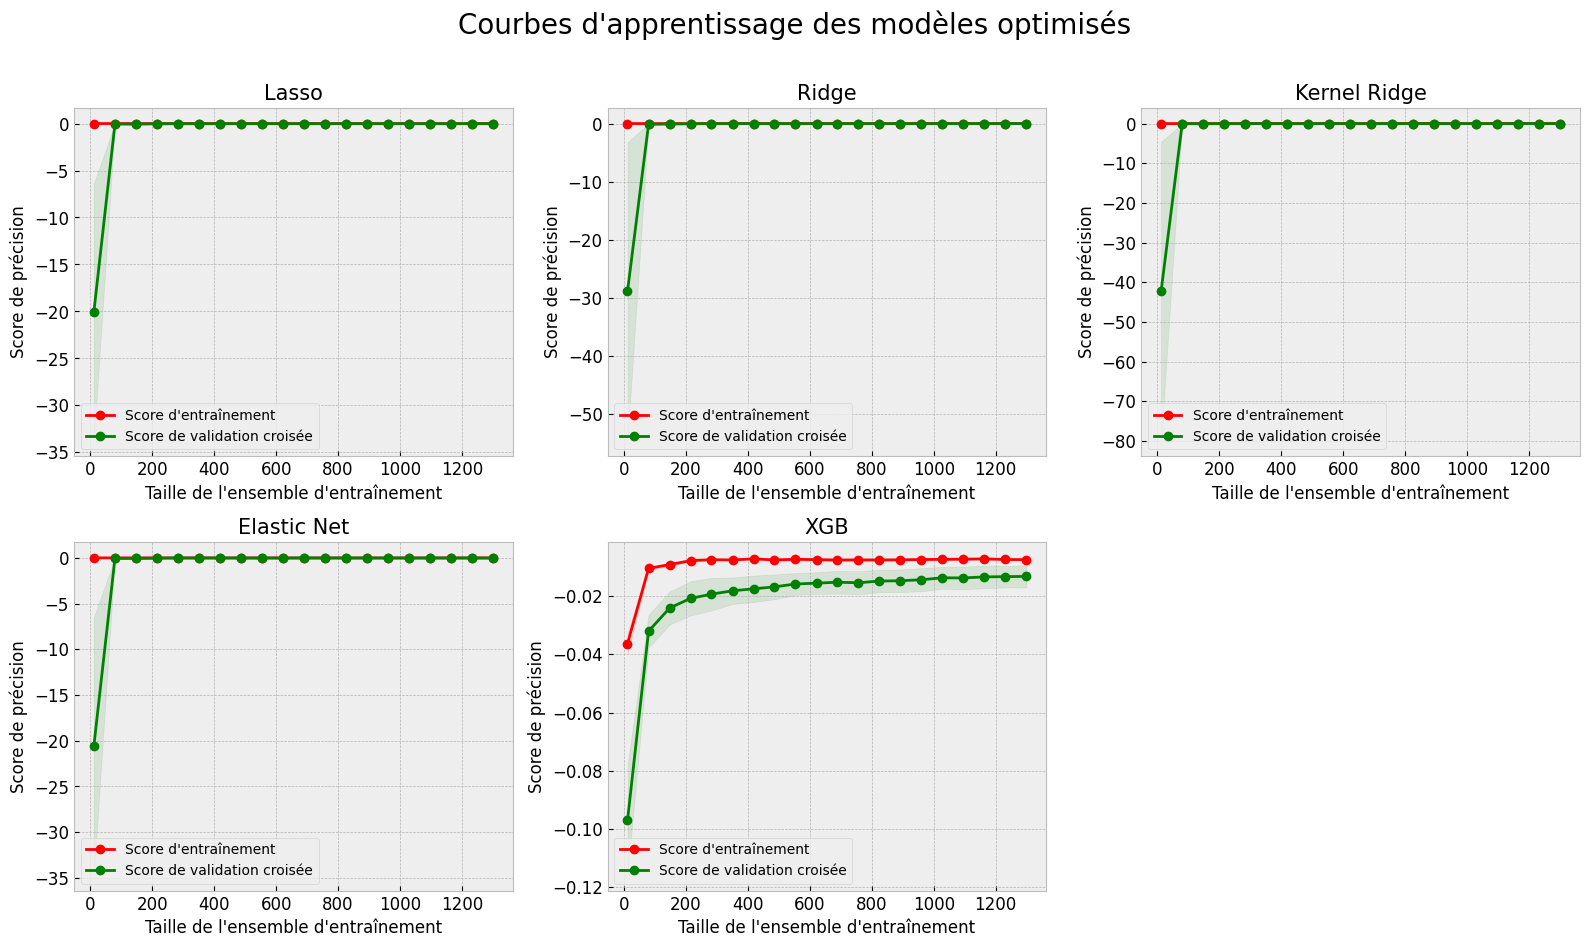

In [ ]:
# Maintenant, tracez les courbes d'apprentissage des modèles optimisés dans des sous-graphiques (SVM, XGB, GB et LGB à omettre pour des raisons de temps de calcul)
# Temps de calcul : environ 45 minutes
plt.figure(figsize=(16, 14))
lc_models = [lasso_opt, ridge_opt, kernel_ridge_opt, elastic_net_opt, xgb_opt] # , svm_opt, gb_opt, lgb_opt
lc_labels = ['Lasso', 'Ridge', 'Kernel Ridge', 'Elastic Net', 'XGB'] # , 'SVM', 'GB', 'LGB'

for ax, models, labels in zip(range(1, 9), lc_models, lc_labels):
    plt.subplot(3, 3, ax)
    plot_learning_curve(models)
    plt.title(labels, fontsize=15)

plt.suptitle("Courbes d'apprentissage des modèles optimisés", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

<div class="alert alert-block alert-primary"; style="background-color: #bededf; padding: 10px;">
⚙️ <strong> Intérpretation </strong>

Cette visusalisation peut nous guider dans notre choix du modèle offrant le meilleur équilibre entre le taux d'erreur sur les données d'entraînement et de test, permettant ainsi de prendre des décisions éclairées quant à la sélection du modèle le plus adapté à notre problématique.
    
</div>

## 5 - Apprentissage ensembliste (Ensemble learning) <a class="anchor"  id="apprentissage_ensembliste"></a>

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px;">
📚 <strong> Définition </strong>

L'**apprentissage ensembliste**, également connu sous le nom d'_ensemble learning_ en anglais, est une technique en apprentissage automatique où plusieurs modèles d'apprentissage sont combinés pour améliorer les performances globales de prédiction. Plutôt que de s'appuyer sur un seul modèle, l'apprentissage ensembliste exploite la diversité des prédictions de plusieurs modèles pour obtenir des résultats plus robustes et précis. L'idée fondamentale derrière l'apprentissage ensembliste est que la combinaison de multiples modèles permet de compenser les faiblesses individuelles de chaque modèle, conduisant à une meilleure capacité de généralisation et à des performances globales plus élevées sur de nouveaux exemples.

</div>

## 5.1 - Apprentissage ensembliste simple <a class="anchor"  id="apprentissage_ensembliste_simple"></a>

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px;">
📚 <strong> Définition </strong>

- Dans l'apprentissage ensembliste **simple**, les modèles individuels sont généralement entraînés de manière indépendante, et leurs prédictions sont ensuite combinées par des méthodes simples telles que la moyenne ou le vote majoritaire.

</div>



In [ ]:
# DataFrame de nos prédictions des modèles de base optimisés
base_model_prediction = pd.DataFrame({'LGB':lgb_opt.predict(df_test_final),
                                      'Lasso':lasso_opt.predict(df_test_final),
                                      'Ridge':ridge_opt.predict(df_test_final),
                                      'GB':gb_opt.predict(df_test_final),
                                      'Kernel Ridge':kernel_ridge_opt.predict(df_test_final),
                                      'Elastic Net':elastic_net_opt.predict(df_test_final),
                                      'XGB':xgb_opt.predict(df_test_final)}) # 'SVM':svm_opt.predict(df_test_final
bold('**Toutes les prédictions des modèles de base :**')
display(base_model_prediction.head())

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


**Toutes les prédictions des modèles de base :**

LGB      Lasso      Ridge         GB  Kernel Ridge  Elastic Net  \
0  11.601223  11.611813  11.610714  11.652547     11.624814    11.611582   
1  11.889863  11.859735  11.852777  11.836708     11.890496    11.859683   
2  12.030574  12.022832  12.031541  12.103944     12.063490    12.023036   
3  12.110057  12.115175  12.129526  12.089660     12.142126    12.114465   
4  12.073865  12.093830  12.085917  12.049036     12.099993    12.094342   

         XGB  
0  11.640113  
1  11.859456  
2  12.025501  
3  12.052954  
4  12.037606

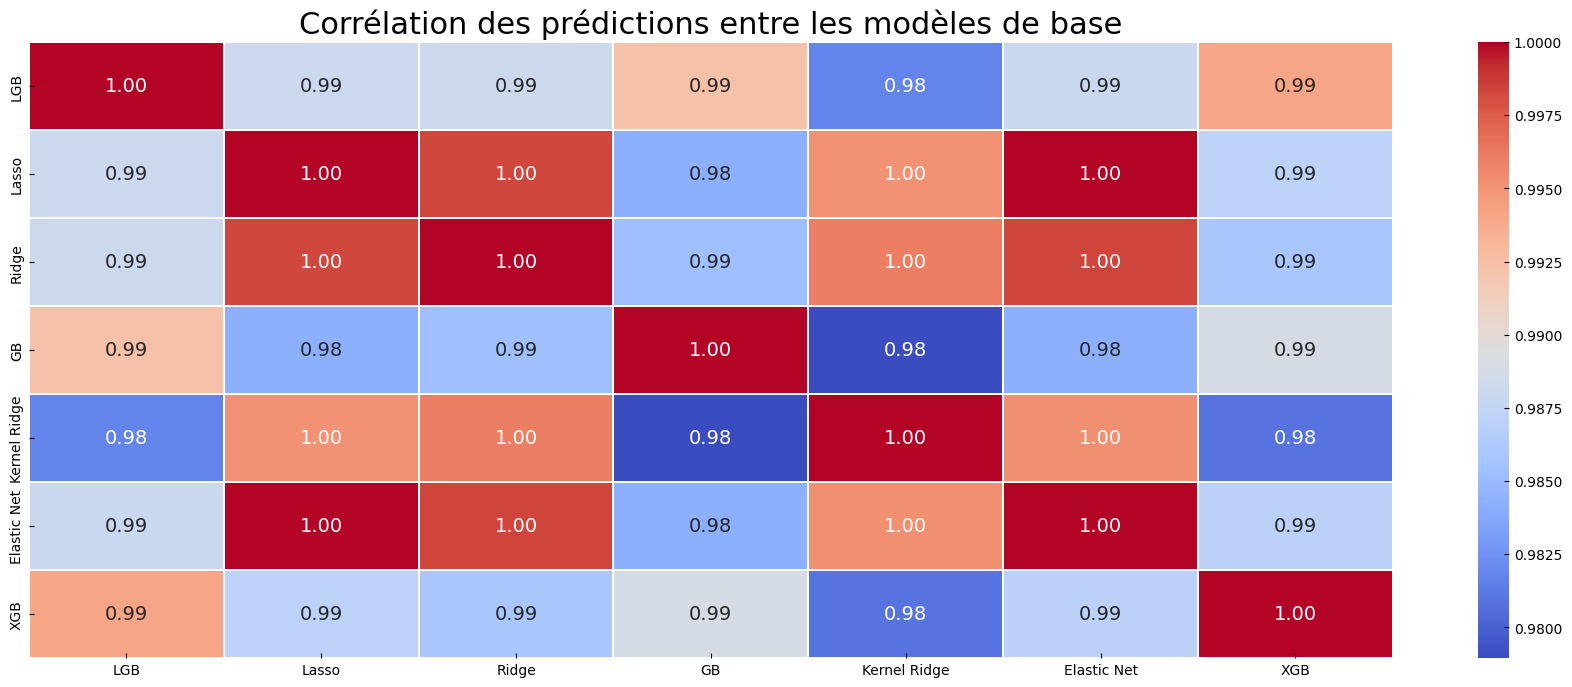

In [ ]:
# Visualisons les corrélations entre les prédictions des modèles de base.
fig, ax = plt.subplots(figsize=(22, 8))
sns.heatmap(base_model_prediction.corr(), annot=True, cmap='coolwarm', ax=ax, fmt='.2f', linewidths=0.05, annot_kws={'size': 14})
ax.set_title('Corrélation des prédictions entre les modèles de base', fontsize=22)
plt.show()

In [ ]:
# Maintenant, construisons un ensemble de moyennes simple et prédisons avec
y_kernel_ridge = np.expm1(kernel_ridge_opt.predict(df_test_final))
# y_svm = np.expm1(svm_opt.predict(df_test_final))
y_lgb = np.expm1(lgb_opt.predict(df_test_final))
y_gb = np.expm1(gb_opt.predict(df_test_final))
y_ridge = np.expm1(ridge_opt.predict(df_test_final))

# Moyenne des 5 prédictions pour former la prédiction finale.
avg_ensemble = (y_kernel_ridge + y_lgb + y_gb + y_ridge)/5 # + y_svm
submission_avg = pd.DataFrame()
submission_avg['Id'] = df_test.id
submission_avg['SalePrice'] = avg_ensemble
submission_avg.to_csv('average_ensemble.csv', index = False)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


## 5.2 - Apprentissage ensembliste avancé <a class="anchor"  id="apprentissage_ensembliste_avance"></a>

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px;">
📚 <strong> Définition </strong>

- L'apprentissage ensembliste **avancé** implique des techniques plus sophistiquées qui combinent les modèles individuels de manière plus complexe et adaptative pour maximiser les performances.
- Un exemple d'apprentissage ensembliste avancé comprennent des techniques telle que le **Stacking**, qui implique l'utilisation d'un modèle de métaprédiction qui prend en compte les prédictions de plusieurs modèles de base, en utilisant ces prédictions comme nouvelles caractéristiques pour prédire la cible finale.
</div>



In [ ]:
!pip install vecstack

  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19863 sha256=5472587b5743dbeae6ff0cd08a73590d6899a1bd91dbe1d44abf01c50b2135bf
  Stored in directory: /root/.cache/pip/wheels/b8/d8/51/3cf39adf22c522b0a91dc2208db4e9de4d2d9d171683596220
Successfully built vecstack


In [ ]:
# Importer la méthode de stacking depuis vecstack
from vecstack import stacking
from sklearn.metrics import mean_squared_error

# Initialiser les modèles de base. Nous utiliserons les mêmes modèles de base que l'ensemble de moyennage
base_models = [kernel_ridge_opt, lgb_opt, gb_opt, ridge_opt] # , svm_opt

bold('**Effectuer le stacking**')
# Effectuer le stacking
S_train, S_test = stacking(base_models,                # liste des modèles de base
                           df_train_final, y_train, df_test_final,
                           regression = True,

                           mode = 'oof_pred_bag',      # mode: oof pour l'ensemble d'entraînement, prédire l'ensemble de test
                                                       # dans chaque fold et voter
                           needs_proba = False,        # prédire les étiquettes de classe (si vous avez besoin
                                                       # de probabilités - réglez sur True)
                           save_dir = None,            # ne pas enregistrer le résultat et le journal (pour enregistrer
                                                       # dans le répertoire actuel - régler sur '.')
                           metric = mean_squared_error,# métrique: callable
                           n_folds = 10,               # nombre de folds
                           stratified = False,         # répartition stratifiée des folds
                           shuffle = True,             # mélanger les données
                           random_state =  seed,       # assurer la reproductibilité
                           verbose = 1)                # afficher la progression
bold('**Stacking terminé**')

**Effectuer le stacking**

task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [KernelRidge]
    ----
    MEAN:     [0.01345259] + [0.00283934]
    FULL:     [0.01344829]

model  1:     [LGBMRegressor]
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[L

**Stacking terminé**

In [ ]:
# Entrées caractéristiques pour le méta learner
bold('**Entrées caractéristiques pour le méta learner :**')
display(S_train[:5])
display(S_train.shape)

**Entrées caractéristiques pour le méta learner :**

array([[12.15251524, 12.11213362, 12.15527822, 12.15357111],
       [12.14848789, 11.97641221, 12.00689774, 12.1317058 ],
       [12.21734089, 12.16845075, 12.18984338, 12.21131706],
       [11.97836022, 12.02700969, 12.04320413, 11.95818274],
       [12.51583234, 12.52352447, 12.5284889 , 12.51523202]])

(1444, 4)

In [ ]:
# Ensemble de test (prédiction) pour le méta learner
bold('**Ensemble de test (prédiction) pour le méta learner :**')
display(S_test[:5].shape)
display(S_test.shape)

**Ensemble de test (prédiction) pour le méta learner :**

(5, 4)

(1459, 4)

In [ ]:
# Initialiser le modèle de premier niveau qui est notre méta-apprenant. Nous utiliserons Kernel Ridge.
super_learner = kernel_ridge_opt

# Entraînemment du méta learner sur la sortie des apprenants de base
print('Entrainement du stacking')
super_learner.fit(S_train, y_train)
print("L'ajustement est terminé")

Entrainement du stacking
L'ajustement est terminé


In [ ]:
# Prédictions finales
y_pred_super = np.expm1(super_learner.predict(S_test))

# Soumission finale
submission_super_learner = pd.DataFrame()
submission_super_learner['Id']= df_test.id
submission_super_learner['SalePrice'] = y_pred_super
submission_super_learner.to_csv('learner.csv', index = False)

In [108]:
!pip freeze > requirements.txt